In [10]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict

In [19]:
#Define State
class BMIState(TypedDict):
    weight_kg : float
    height_m : float
    bmi : float
    category: str

In [12]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi,2)
    return state

In [20]:
def label_bmi(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state['category'] = "Normal"
    elif 25 <= bmi < 30:
        state['category'] = "Overweight"
    else:
        state['category'] = "Obese"
    return state

In [22]:
#Define your Graph
graph = StateGraph(BMIState)

#Add Nodes to your graph
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('label_bmi',label_bmi)

#Add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi','label_bmi')
graph.add_edge('label_bmi',END)

#compile the graph
workflow = graph.compile()

In [23]:
#Execute the Graph
initial_state = {'weight_kg':80,'height_m':1.73}
final_state = workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}


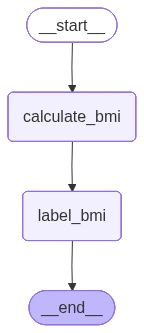

In [25]:
#Display the Visual diagram of Graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())